# Train model

In [1]:
import matplotlib.pyplot as plt
import pylab
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import load_model
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

from ipynb.fs.full.classifier_definitions import classifier1
from ipynb.fs.full.data_functions import convert, visualize

from keras.callbacks import EarlyStopping

Using TensorFlow backend.
PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [2]:
# load stage 3B data
f_path = 'training_data/3B/y.txt'
y = pd.read_csv(f_path)
y = y.drop(y.columns[0],axis = 1)
y = y.drop(0,axis = 0)

f_path = 'training_data/3B/X.txt'
X = pd.read_csv(f_path)
X = X.drop(X.columns[0],axis = 1)
X = X.drop(0,axis = 0)


In [3]:
# Normalize data
X_t = X.transpose()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_t)
X_scaled = pd.DataFrame(X_scaled.transpose())

# Train test split with sklearn
Xtrain,Xtest,ytrain,ytest = train_test_split(X_scaled.values,y.values,test_size=0.1,random_state=13,stratify=y)

In [4]:
# Reshape data
X_train = []
for i in np.arange(len(Xtrain)):
    h = Xtrain[i].reshape(4096,1)
    X_train.append(h)
X_train = np.asarray(X_train)

X_test = []
for i in np.arange(len(Xtest)):
    h = Xtest[i].reshape(4096,1)
    X_test.append(h)
X_test = np.asarray(X_test)

# one hot code y
y_train = to_categorical(ytrain)
y_test = to_categorical(ytest)

In [5]:
# Build
model = classifier1()

# compile model
ad = optimizers.Adam(lr=0.00005)
model.compile(loss='categorical_crossentropy', optimizer=ad, metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
# Train

epoch = 10
batch_size = 10
record = model.fit(X_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
11969/11969 [==============================] - 214s 18ms/step - loss: 0.6445 - acc: 0.6021
Epoch 2/10
11969/11969 [==============================] - 134s 11ms/step - loss: 0.4750 - acc: 0.7605
Epoch 3/10
11969/11969 [==============================] - 108s 9ms/step - loss: 0.3464 - acc: 0.8601
Epoch 4/10
11969/11969 [==============================] - 105s 9ms/step - loss: 0.2495 - acc: 0.9131
Epoch 5/10
11969/11969 [==============================] - 110s 9ms/step - loss: 0.1823 - acc: 0.9382
Epoch 6/10
11969/11969 [==============================] - 112s 9ms/step - loss: 0.1378 - acc: 0.9546
Epoch 7/10
11969/11969 [==============================] - 132s 11ms/step - loss: 0.1093 - acc: 0.9632
Epoch 8/10
11969/11969 [==============================] - 117s 10ms/step - loss: 0.0870 - acc: 0.9703
Epoch 9/10
11969/11969 [==============================] - 106s 9ms/step - loss: 0.0697 - acc: 0.9759
Epoch 10/10
11969/11969 [==============

In [7]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1330/1330 [==============================] - 5s 4ms/step
Test loss: 0.06252682615715759
Test accuracy: 0.9766917290544151


dict_keys(['loss', 'acc'])


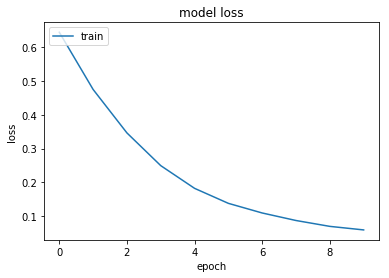

In [8]:
print(record.history.keys())
# "Loss"
plt.plot(record.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# See probability distribution of predictions on Xtrain and Xtest

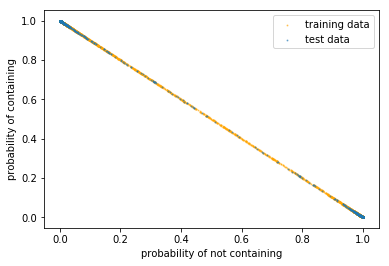

In [9]:
result_test = model.predict(X_test)
neg1 = result_test[0:,0] #first column
pos1 = result_test[0:,1] #second column

result_train = model.predict(X_train)
neg2 = result_train[0:,0] #first column
pos2 = result_train[0:,1] #second column

plt.scatter(neg2, pos2, s=1, color = 'orange',alpha=0.5, label = 'training data')
plt.scatter(neg1, pos1, s=1, alpha=0.5, label = 'test data')

plt.xlabel("probability of not containing")
plt.ylabel("probability of containing")
plt.legend(loc='upper right')
plt.show()

# look into test set

The following results show that the initial phase of gravitational wave is easy to be mixed up with sinusoids or seesaw. But in real applications its not going to be a huge issue because the merge signal is always stronger

However, in general it seems like when waveform has high frequency, the net cannot really tell. like gausepulse.

  0%|          | 0/1330 [00:00<?, ?it/s]

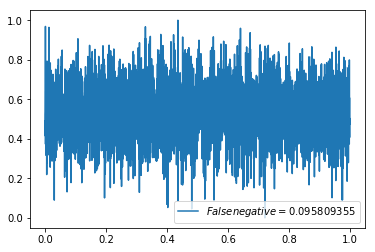

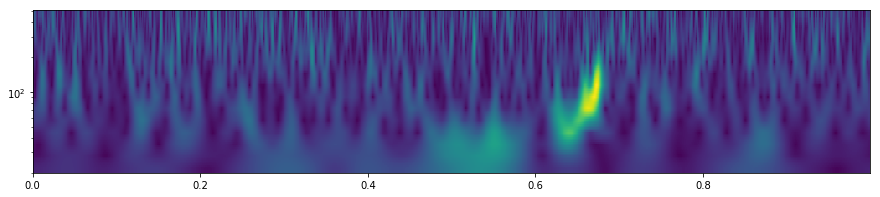

  2%|▏         | 20/1330 [00:02<02:24,  9.07it/s]

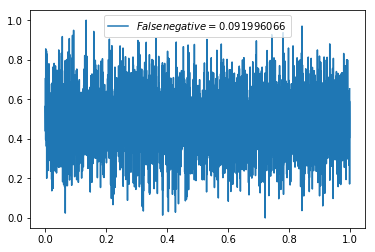

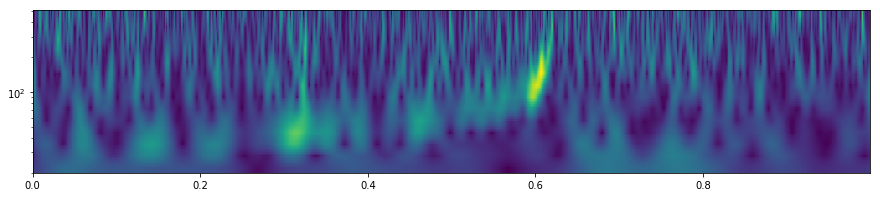

  4%|▍         | 51/1330 [00:03<01:57, 10.93it/s]

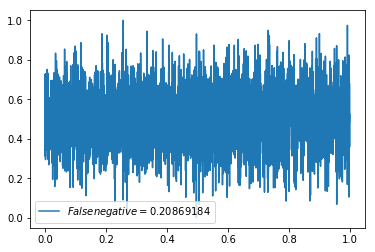

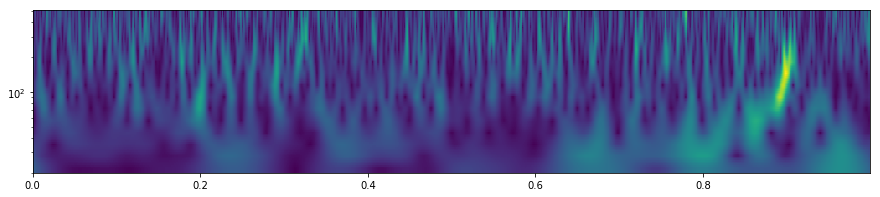

  7%|▋         | 89/1330 [00:05<01:34, 13.19it/s]

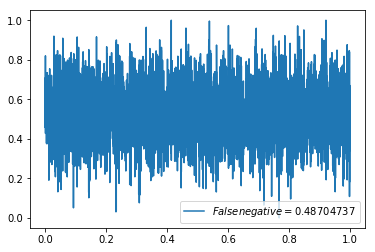

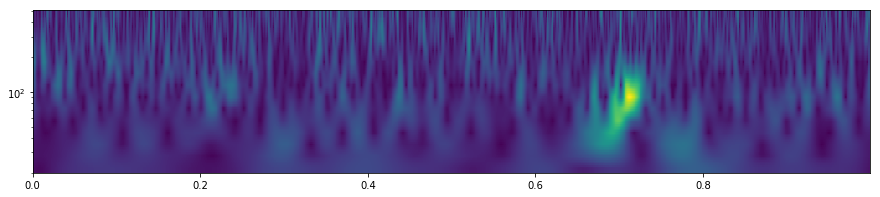

 19%|█▉        | 253/1330 [00:06<00:59, 18.00it/s]

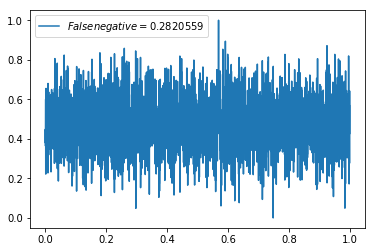

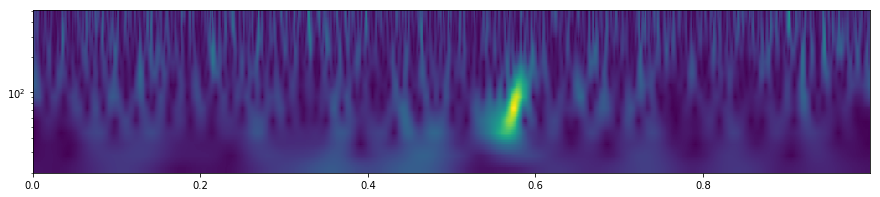

 20%|██        | 268/1330 [00:08<01:14, 14.32it/s]

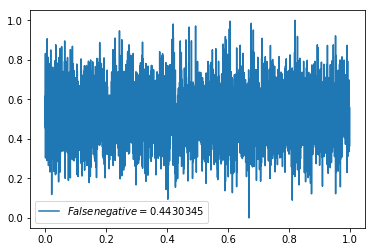

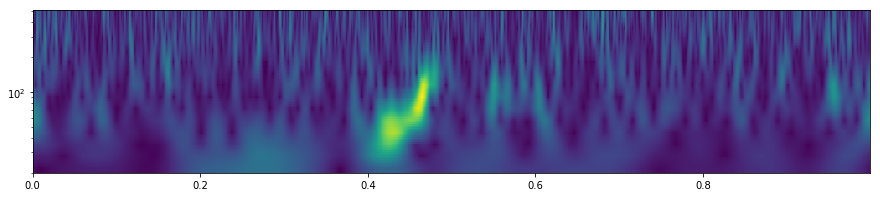

 24%|██▍       | 322/1330 [00:09<00:58, 17.31it/s]

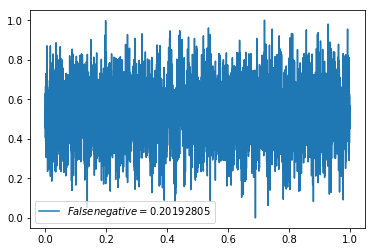

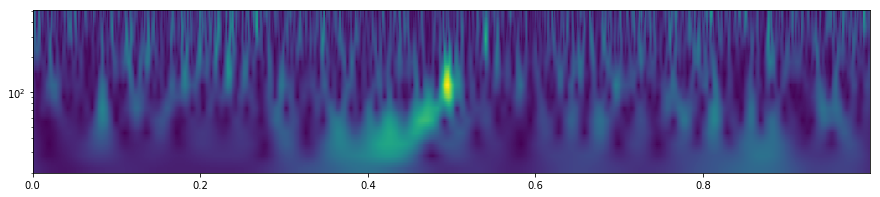

 30%|██▉       | 397/1330 [00:11<00:43, 21.32it/s]

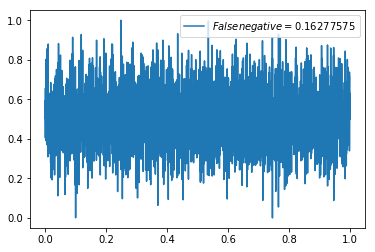

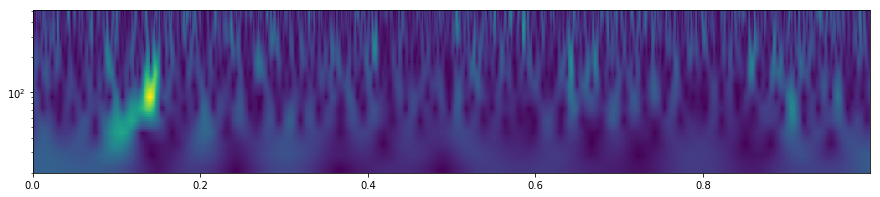

 35%|███▌      | 467/1330 [00:12<00:33, 25.89it/s]

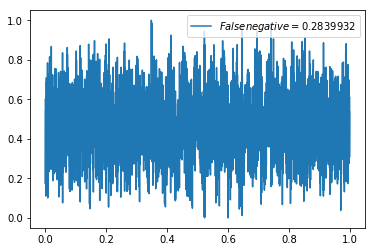

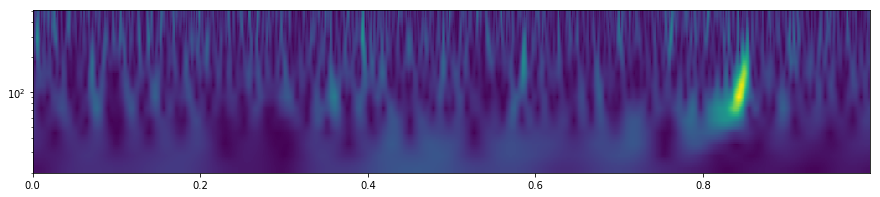

 36%|███▌      | 479/1330 [00:13<00:51, 16.61it/s]

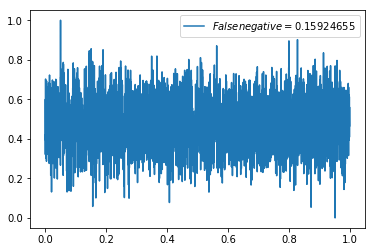

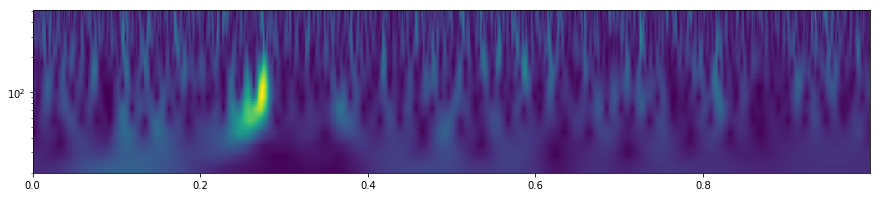

 42%|████▏     | 552/1330 [00:15<00:36, 21.03it/s]

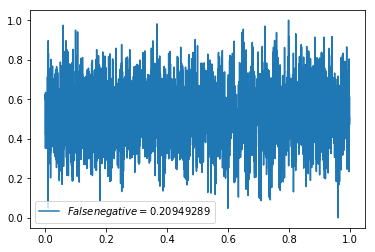

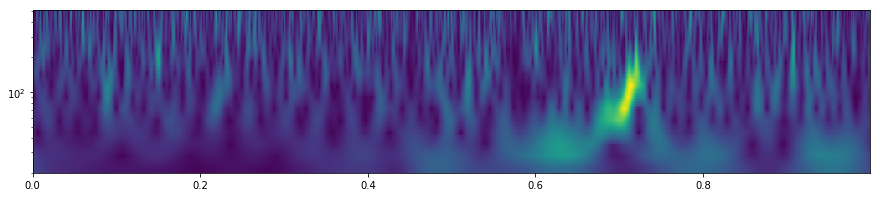

 53%|█████▎    | 703/1330 [00:17<00:23, 27.24it/s]

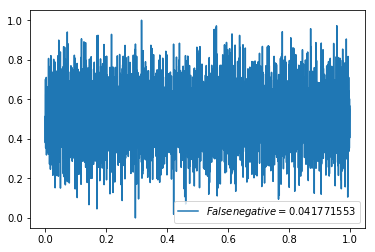

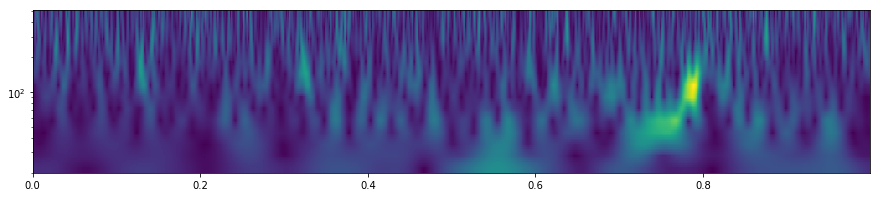

 57%|█████▋    | 759/1330 [00:18<00:19, 29.95it/s]

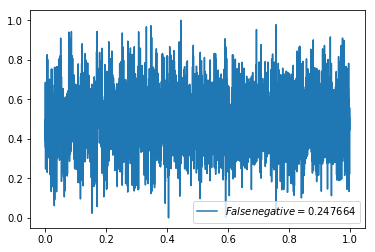

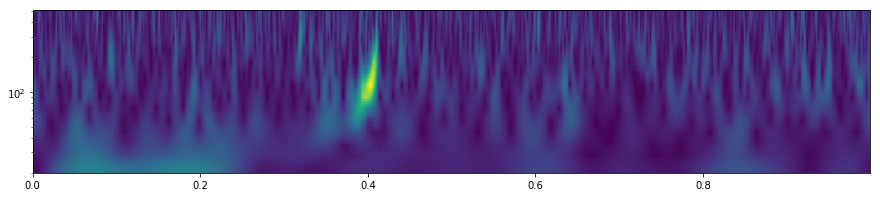

 61%|██████    | 814/1330 [00:19<00:15, 32.49it/s]

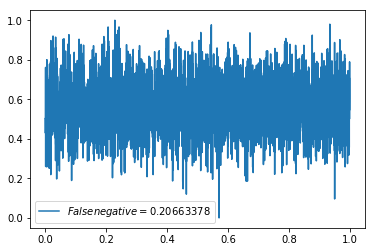

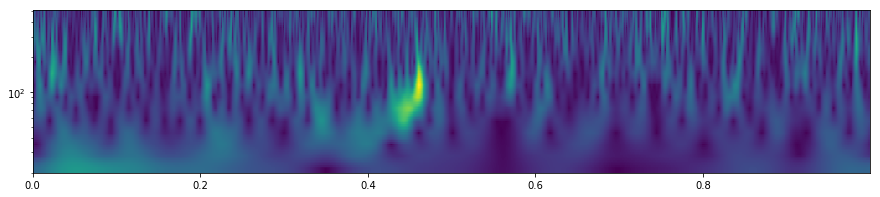

 68%|██████▊   | 909/1330 [00:21<00:11, 38.22it/s]

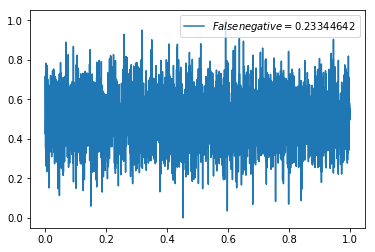

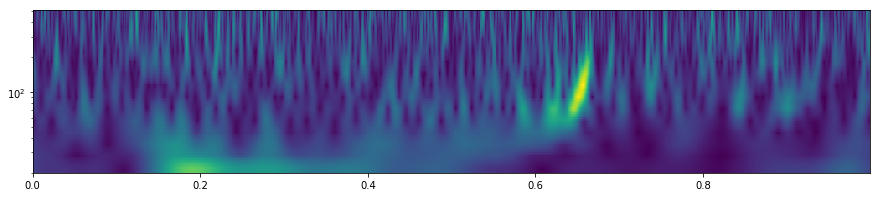

 70%|███████   | 933/1330 [00:22<00:13, 28.63it/s]

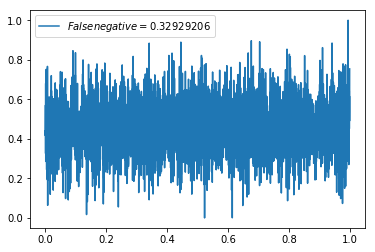

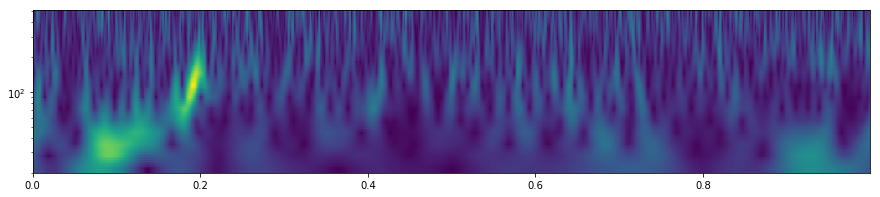

 73%|███████▎  | 970/1330 [00:23<00:12, 28.69it/s]

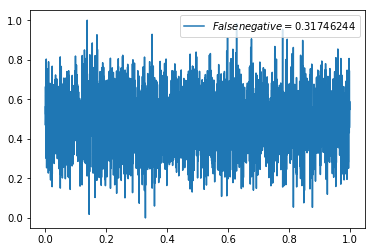

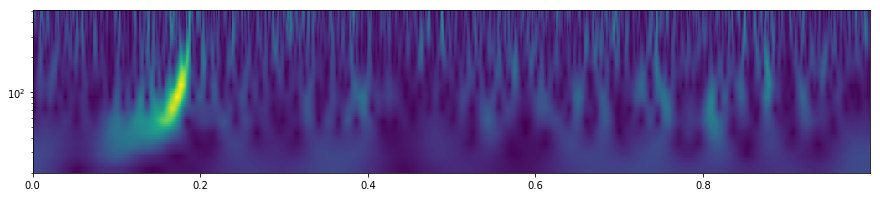

 78%|███████▊  | 1044/1330 [00:25<00:08, 33.43it/s]

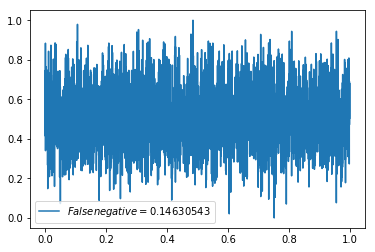

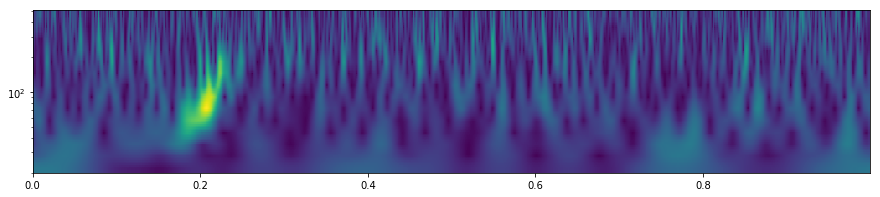

 79%|███████▉  | 1052/1330 [00:26<00:19, 14.15it/s]

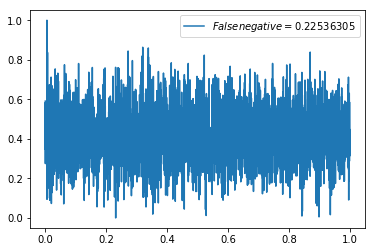

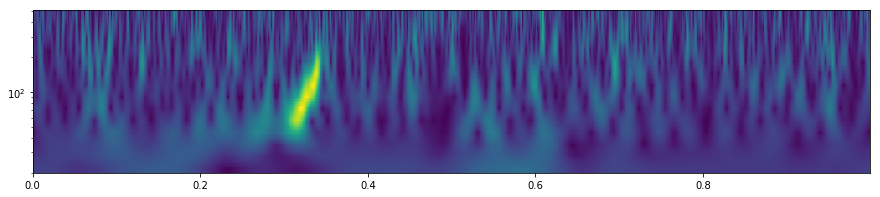

 88%|████████▊ | 1170/1330 [00:28<00:08, 18.71it/s]

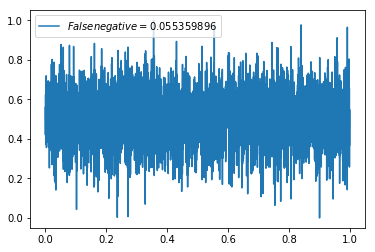

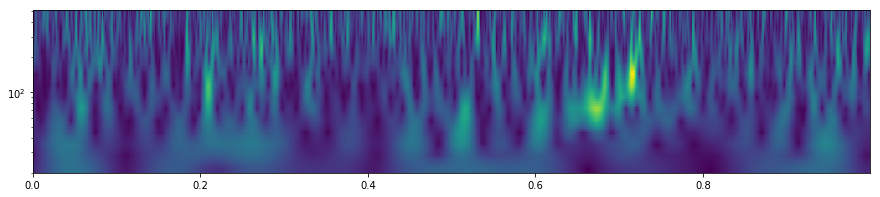

 95%|█████████▍| 1263/1330 [00:29<00:02, 23.73it/s]

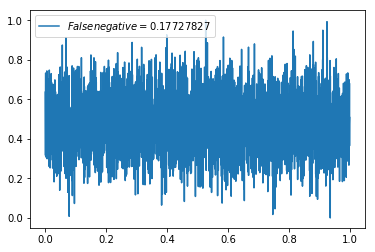

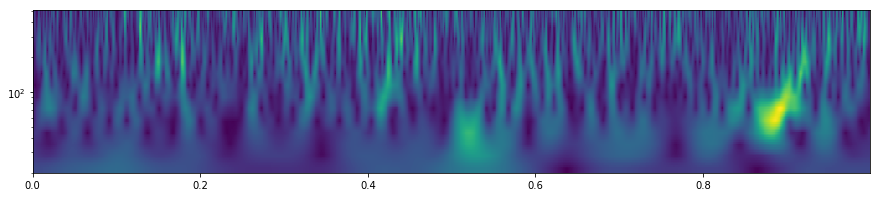

 95%|█████████▌| 1269/1330 [00:30<00:05, 10.81it/s]

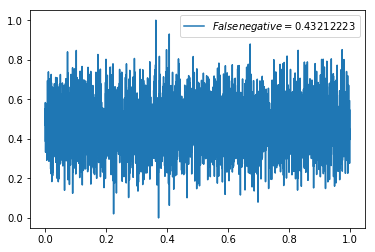

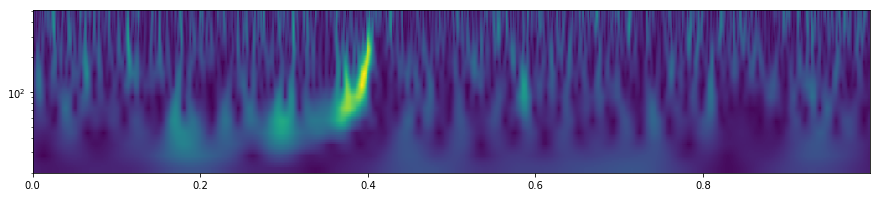

 98%|█████████▊| 1298/1330 [00:32<00:02, 13.02it/s]

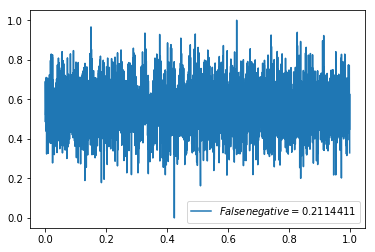

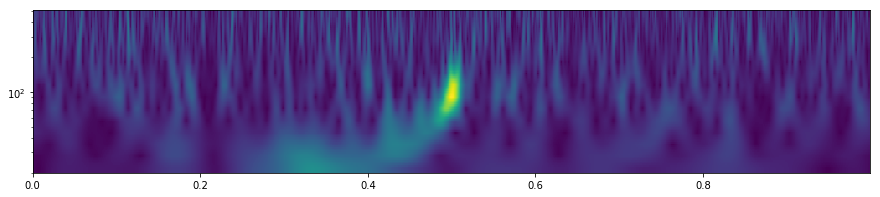

 98%|█████████▊| 1302/1330 [00:33<00:04,  6.98it/s]

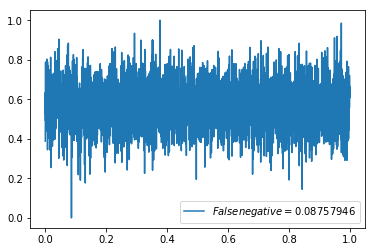

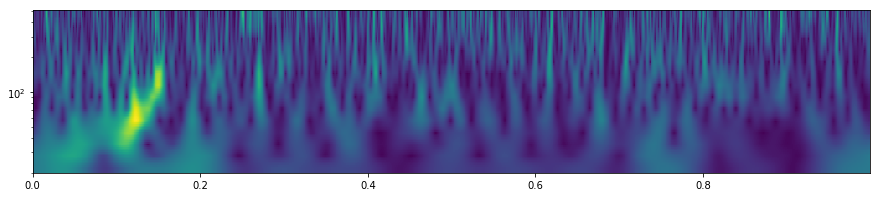

 99%|█████████▉| 1318/1330 [00:34<00:01,  7.74it/s]

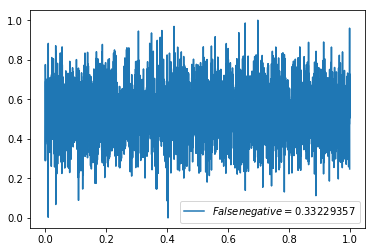

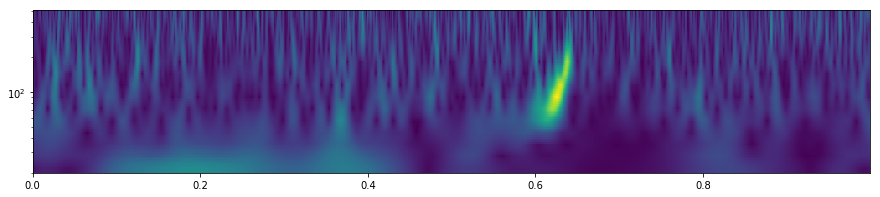

 99%|█████████▉| 1321/1330 [00:36<00:02,  4.26it/s]

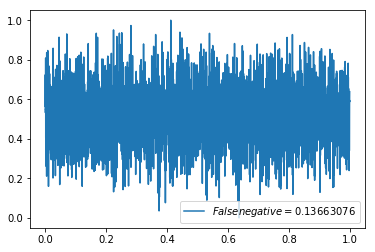

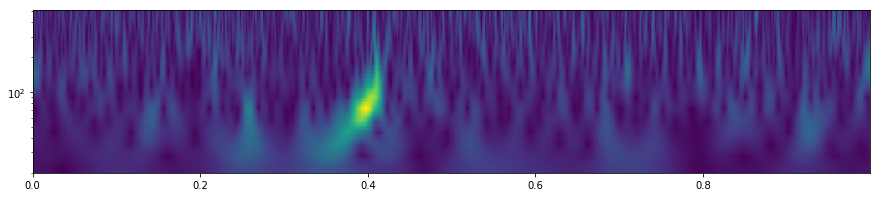

  0%|          | 0/1330 [00:00<?, ?it/s]

False negative:  26


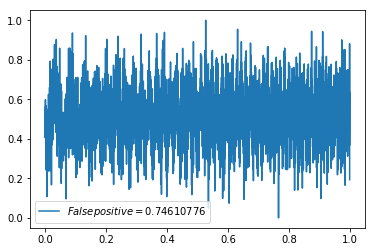

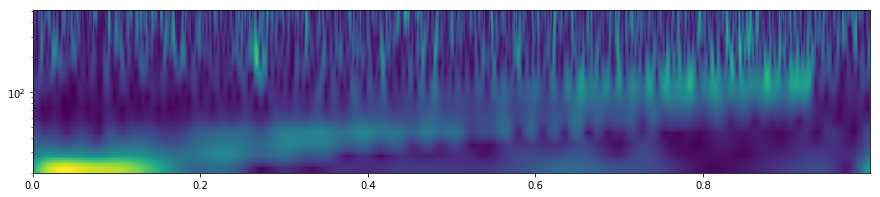

 10%|█         | 136/1330 [00:01<00:11, 102.79it/s]

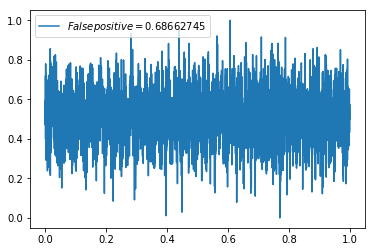

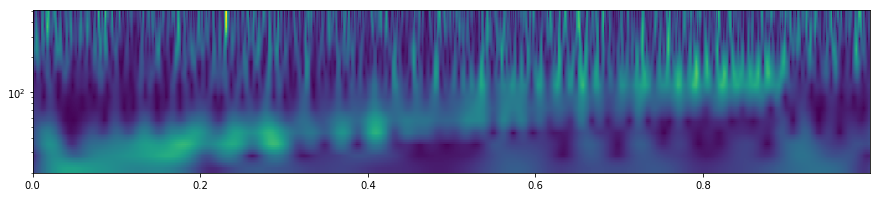

 14%|█▍        | 185/1330 [00:02<00:17, 65.33it/s] 

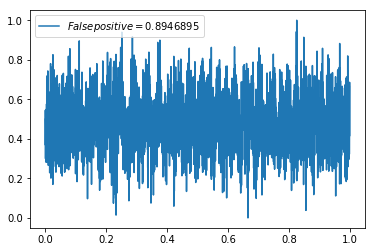

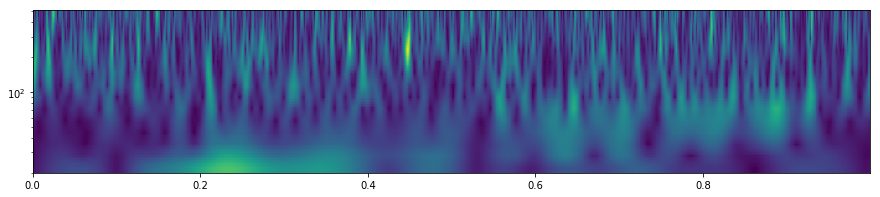

 21%|██        | 280/1330 [00:03<00:15, 69.52it/s]

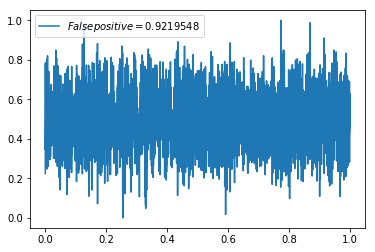

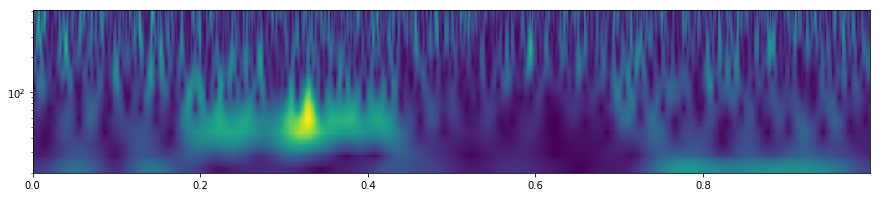

 32%|███▏      | 427/1330 [00:05<00:11, 77.98it/s]

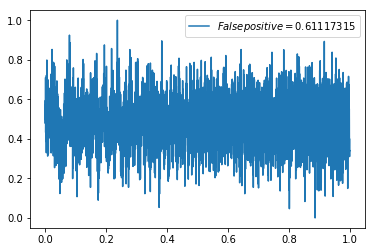

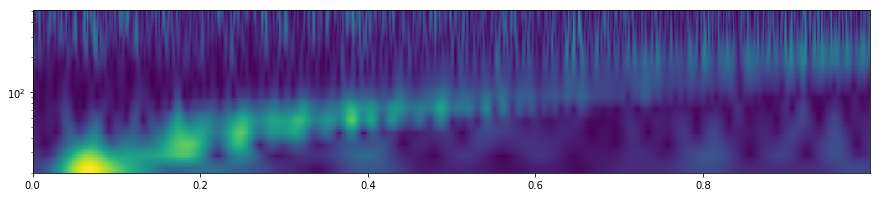

100%|██████████| 1330/1330 [00:06<00:00, 197.10it/s]

False positive:  5


In [10]:
# find wrong predictions in test set

false_negative = 0
for i in tqdm(range(len(pos1))):
    if pos1[i] < 0.5 and ytest[i][0]==1:
        false_negative += 1
        falneg_wf = convert(Xtest[i])
        pylab.plot(falneg_wf.sample_times, falneg_wf, 
                   label = '$False negative = %s$'%pos1[i])
        pylab.legend()
        pylab.show()
        visualize(falneg_wf)
        
print("False negative: ", false_negative)


false_positive = 0
for i in tqdm(range(len(pos1))):
    if pos1[i] > 0.5 and ytest[i][0]==0:
        false_positive += 1
        falpos_wf = convert(Xtest[i])
        pylab.plot(falpos_wf.sample_times, falpos_wf, 
                   label = '$False positive = %s$'%pos1[i])
        pylab.legend()
        pylab.show()
        visualize(falpos_wf)
        
print("False positive: ", false_positive)

  0%|          | 0/1330 [00:00<?, ?it/s]

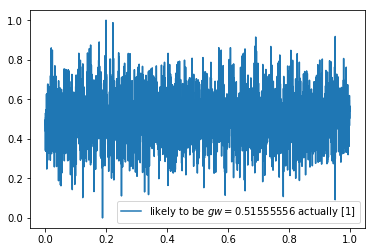

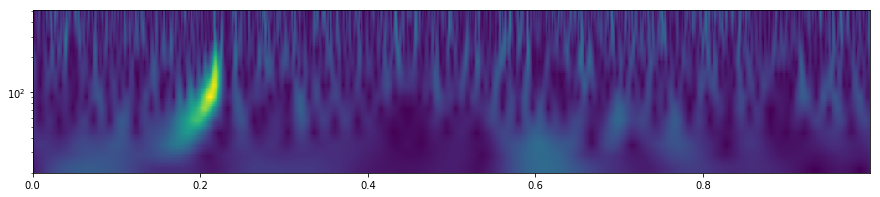

  0%|          | 2/1330 [00:01<14:15,  1.55it/s]

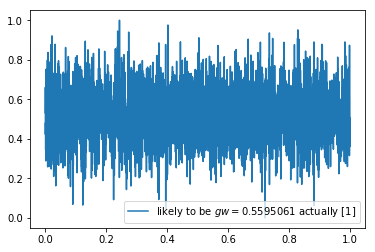

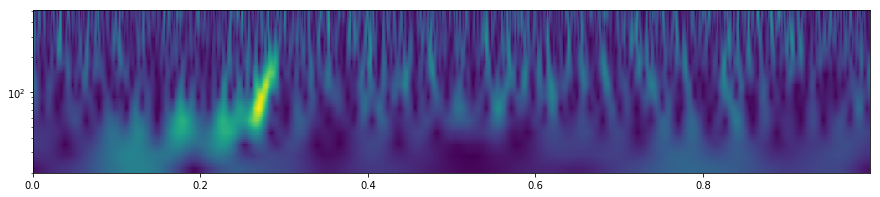

  3%|▎         | 43/1330 [00:02<09:53,  2.17it/s]

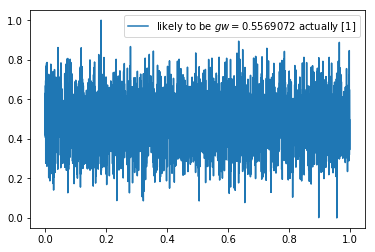

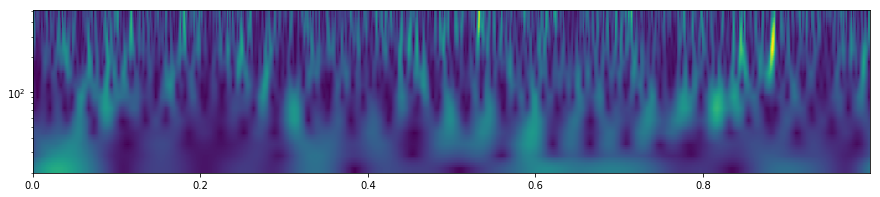

  9%|▉         | 121/1330 [00:03<06:35,  3.06it/s]

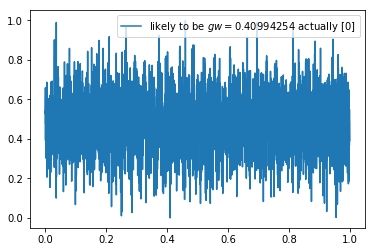

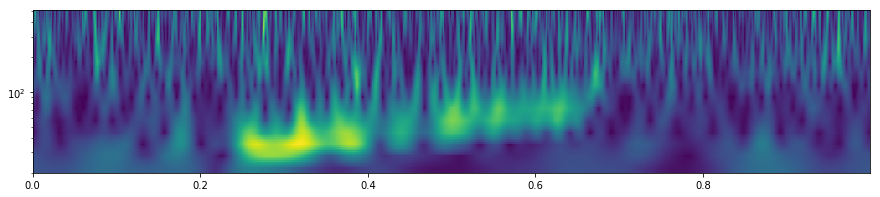

  9%|▉         | 126/1330 [00:05<06:32,  3.07it/s]

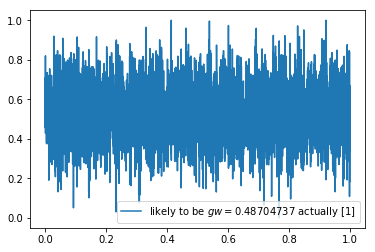

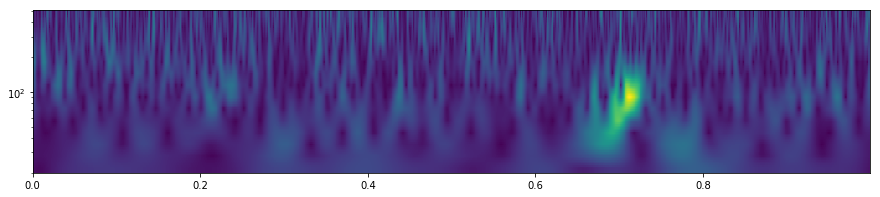

 19%|█▉        | 253/1330 [00:06<04:08,  4.33it/s]

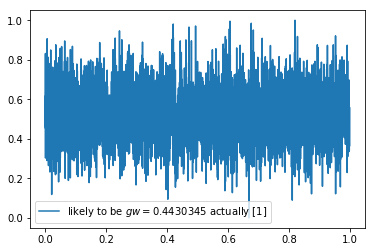

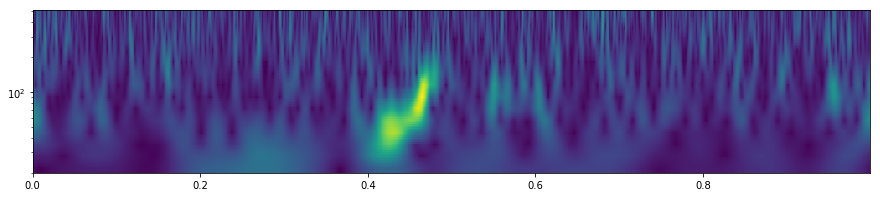

 24%|██▍       | 322/1330 [00:07<02:48,  5.97it/s]

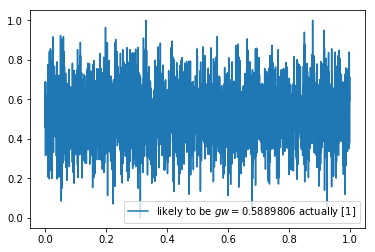

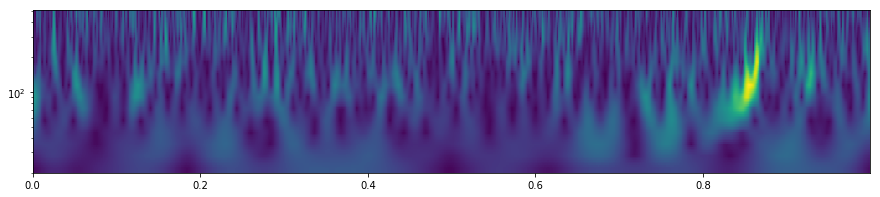

 25%|██▌       | 337/1330 [00:09<02:20,  7.05it/s]

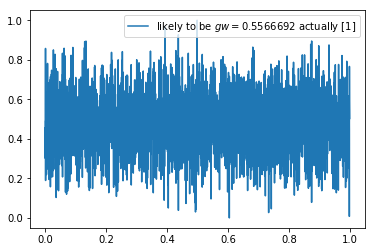

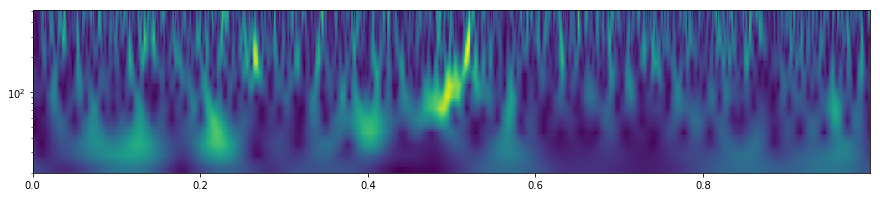

 29%|██▉       | 392/1330 [00:10<01:39,  9.42it/s]

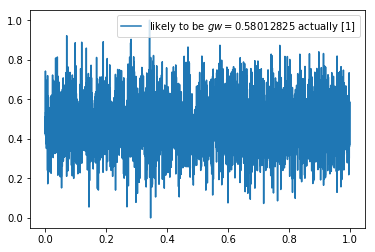

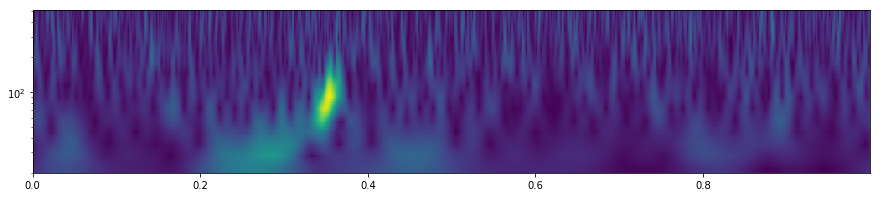

 30%|███       | 401/1330 [00:11<01:46,  8.76it/s]

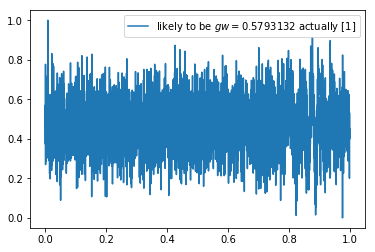

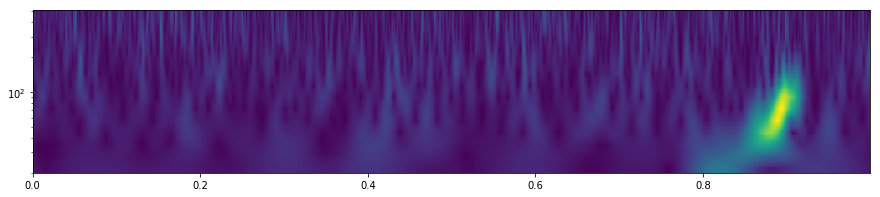

 36%|███▋      | 483/1330 [00:12<01:11, 11.90it/s]

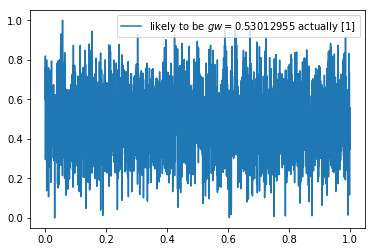

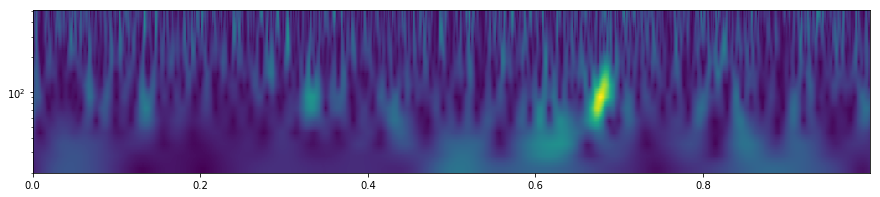

 56%|█████▋    | 749/1330 [00:14<00:35, 16.50it/s]

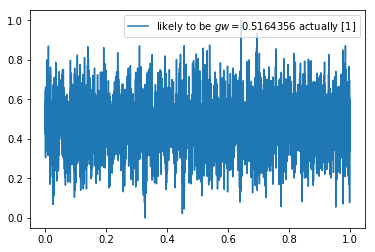

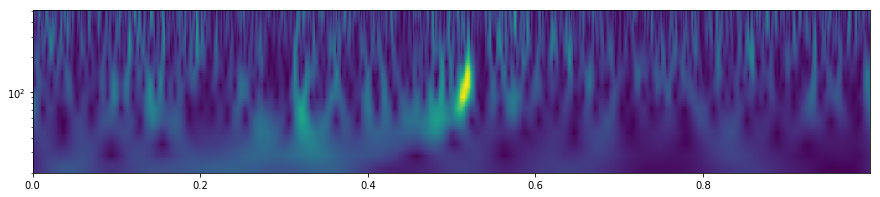

 66%|██████▌   | 878/1330 [00:15<00:20, 22.00it/s]

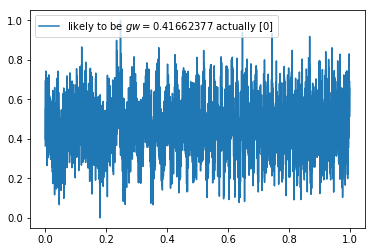

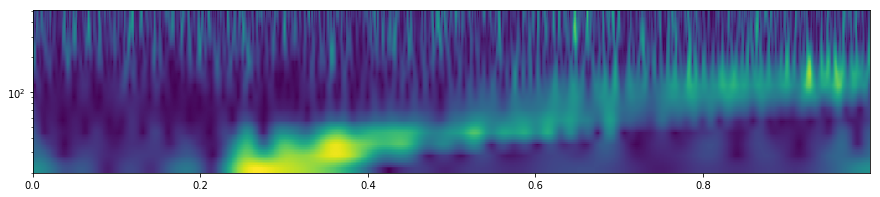

 68%|██████▊   | 904/1330 [00:16<00:19, 22.24it/s]

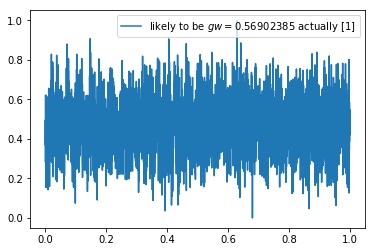

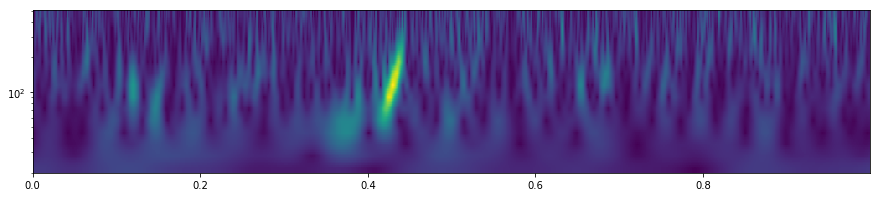

 90%|█████████ | 1198/1330 [00:18<00:04, 30.49it/s]

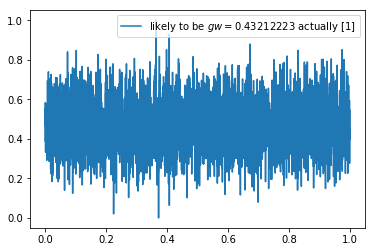

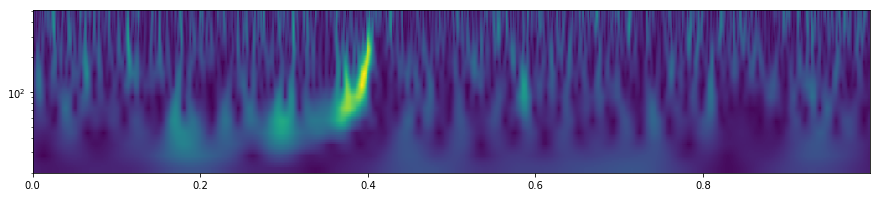

 98%|█████████▊| 1298/1330 [00:19<00:00, 37.03it/s]

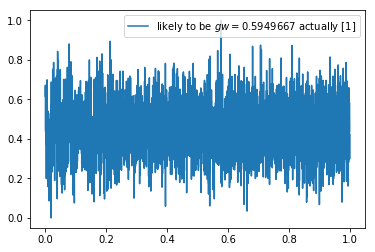

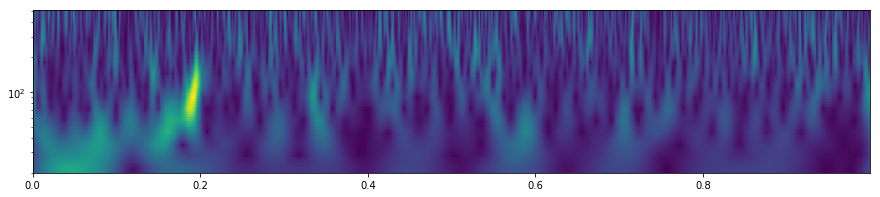

100%|██████████| 1330/1330 [00:20<00:00, 64.54it/s]

uncertained:  16


In [11]:
# find the ones that the model is unsure of

uncertain_count = 0
for i in tqdm(range(len(pos1))):
    if pos1[i] > 0.4 and pos1[i] < 0.6:
        uncertain_count += 1
        unsure_wf = convert(Xtest[i])
        pylab.plot(unsure_wf.sample_times, unsure_wf, 
                   label = 'likely to be '+'$gw=%s$'%pos1[i] + ' actually '+ str(ytest[i]))
        pylab.legend()
        pylab.show()
        visualize(unsure_wf)

print("uncertained: ", uncertain_count)